In [27]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
file = 'D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv'
df1 = pd.read_csv(file,index_col = 0)

In [29]:
df1.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [30]:
df1.shape

(246009, 122)

In [31]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# 1st Cleaning 

In [32]:
# Check null
round(df1.isnull().sum() / df1.shape[0] * 100,2)

TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
SK_ID_CURR                     0.0
Length: 122, dtype: float64

In [33]:
# Remove all the cols have %null > 90% 
from Functions import find_and_remove_null_cols
df1 = find_and_remove_null_cols(df1)

In [34]:
### Split df into 2 small ones, numerical and categorical 
numerical_data = df1._get_numeric_data()
categorical_data = df1.drop(columns=numerical_data.columns)

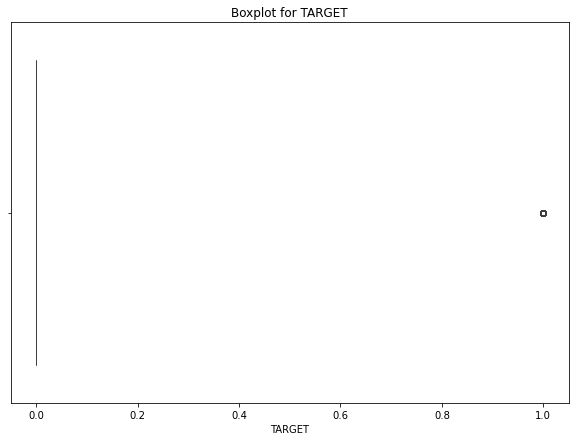

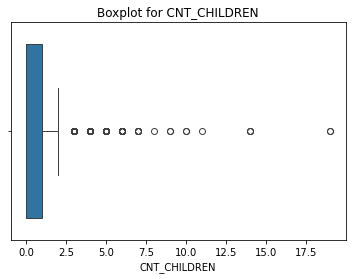

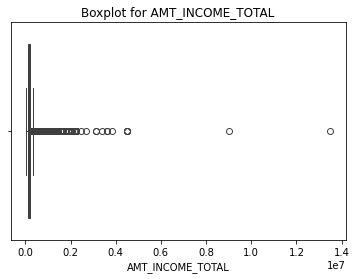

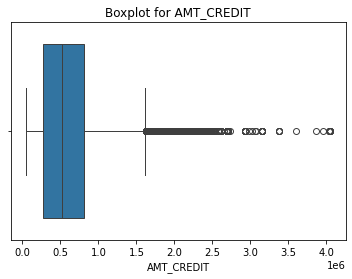

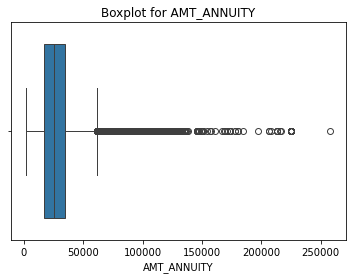

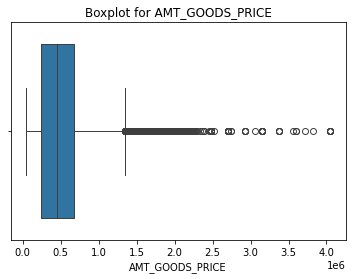

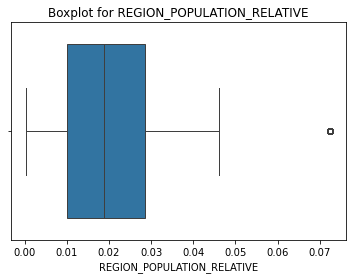

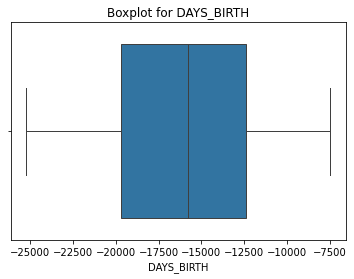

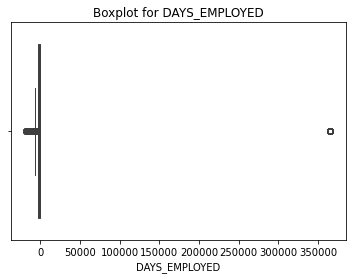

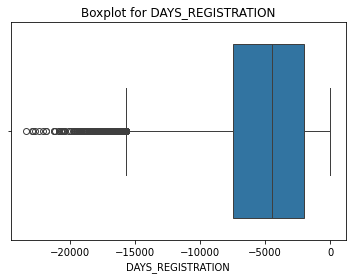

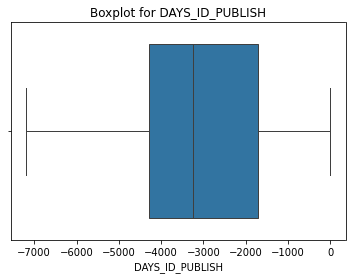

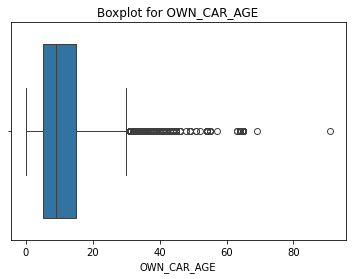

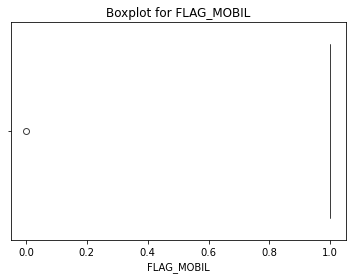

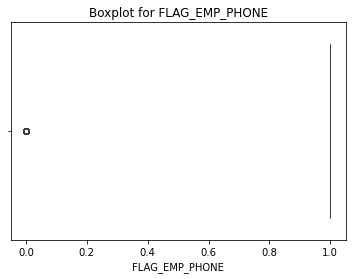

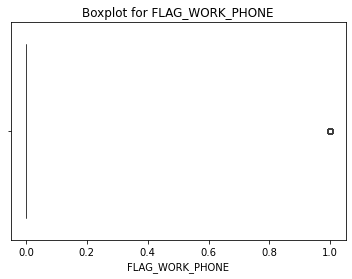

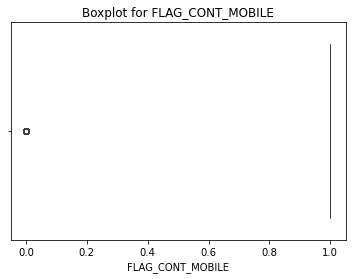

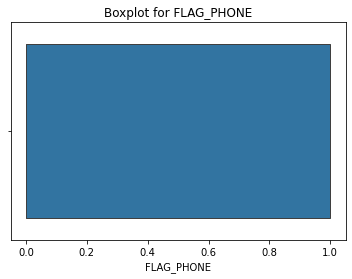

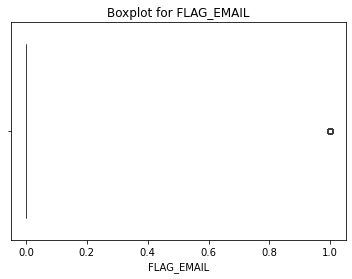

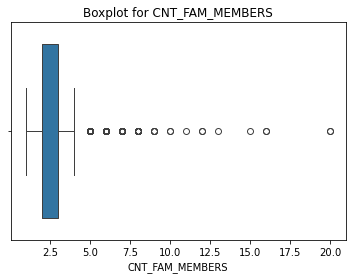

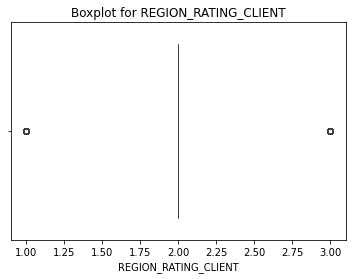

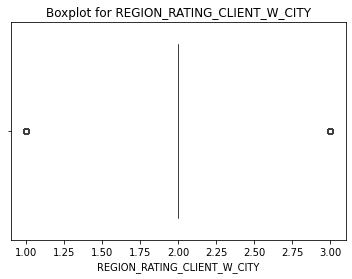

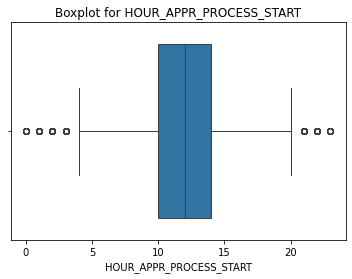

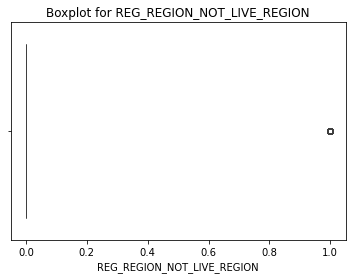

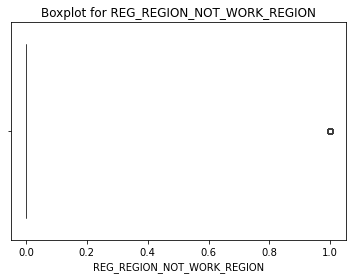

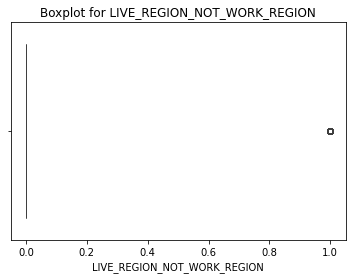

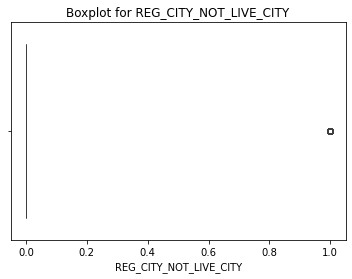

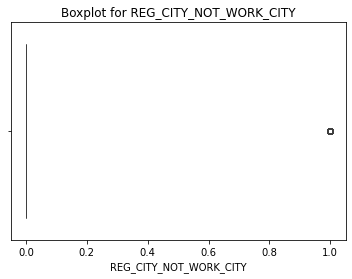

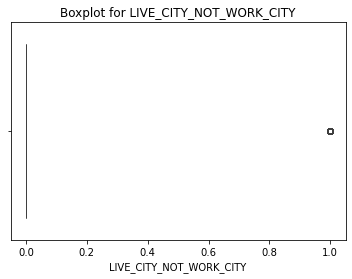

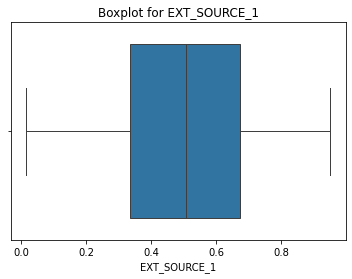

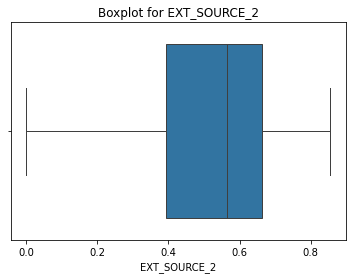

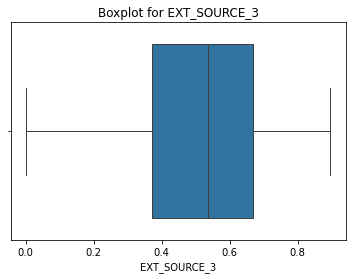

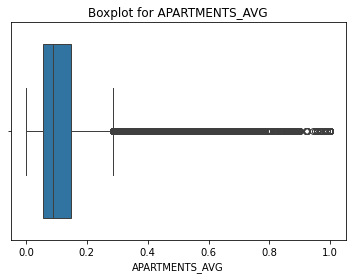

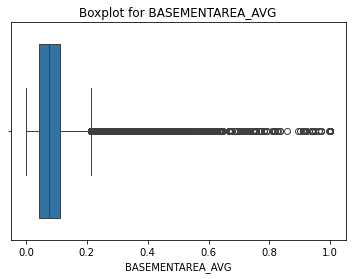

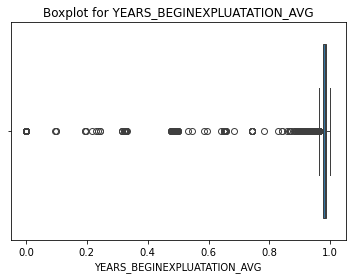

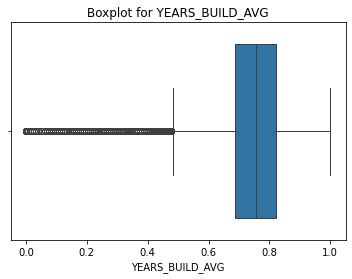

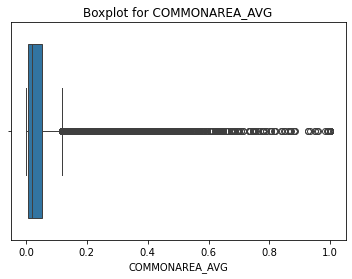

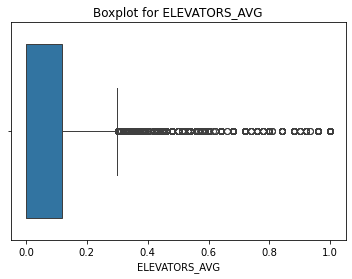

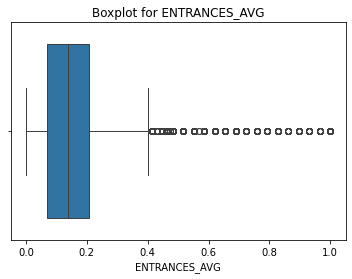

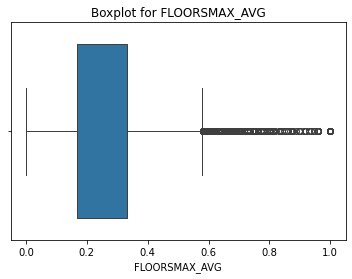

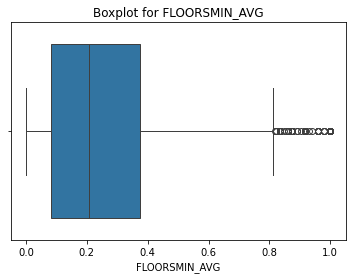

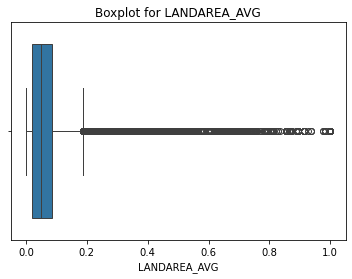

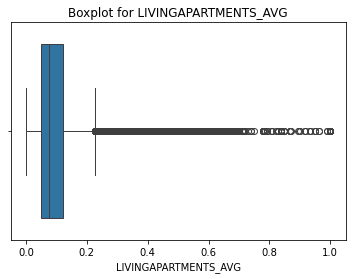

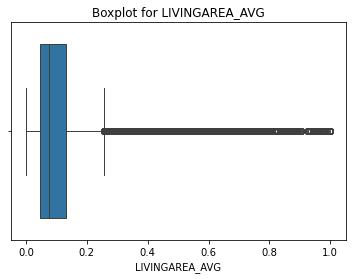

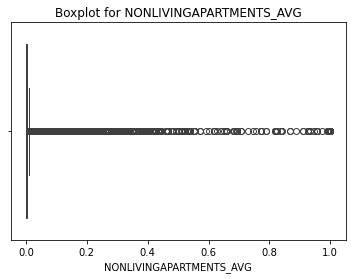

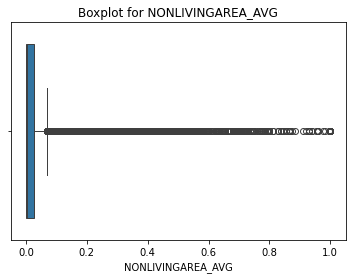

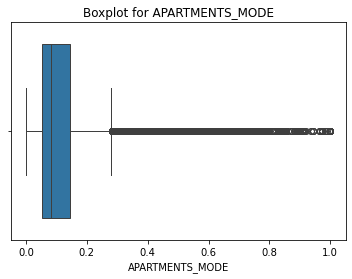

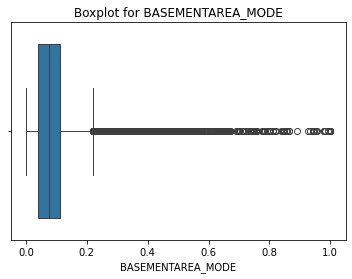

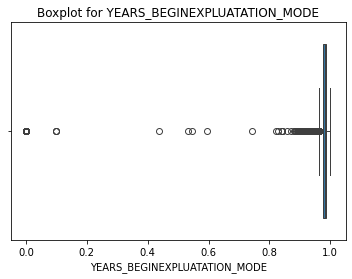

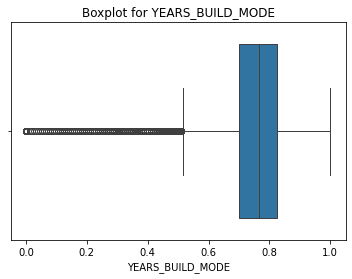

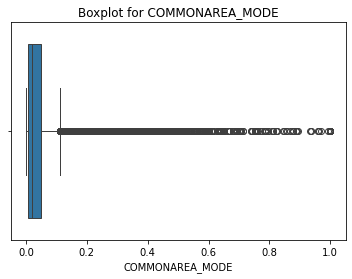

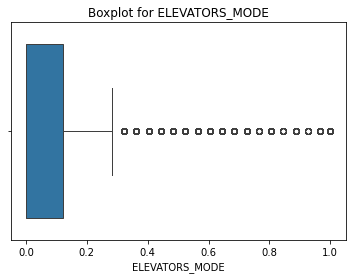

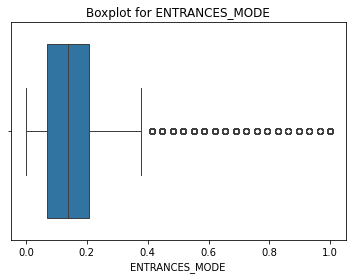

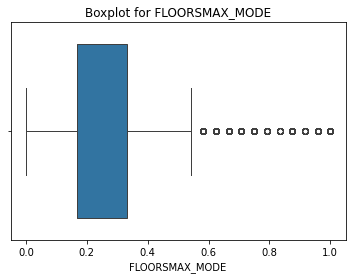

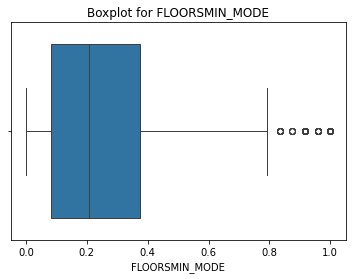

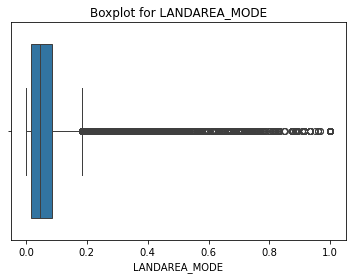

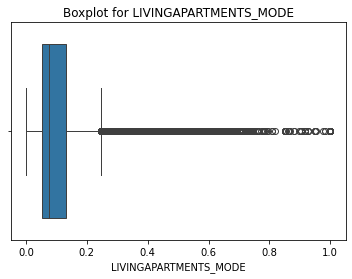

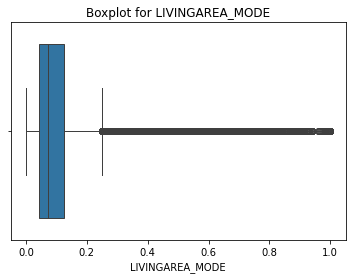

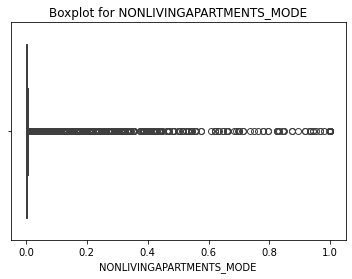

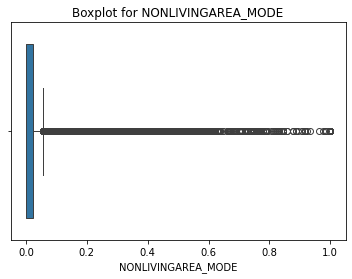

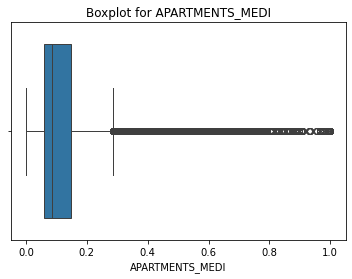

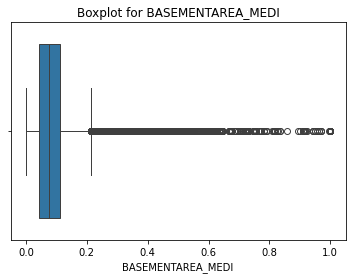

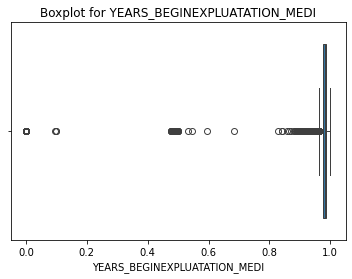

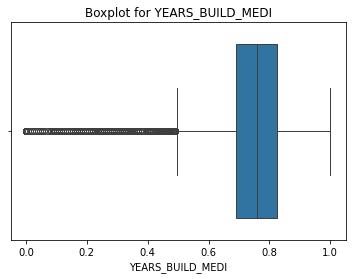

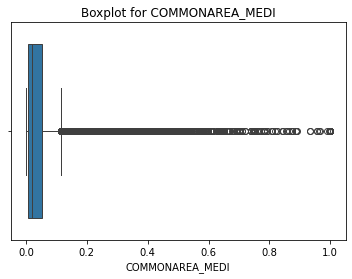

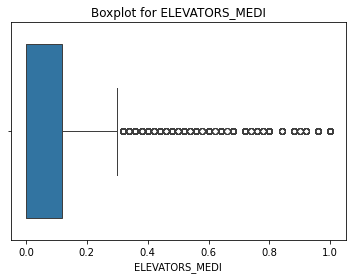

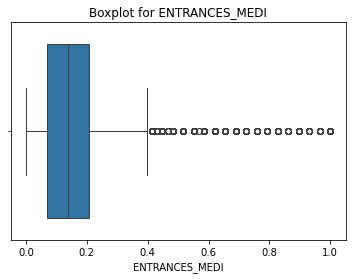

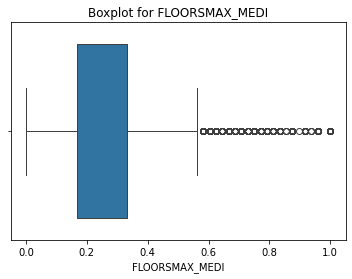

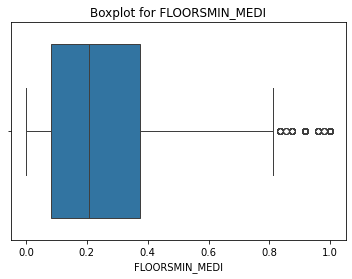

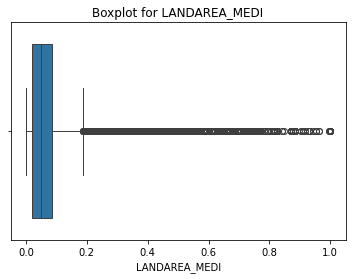

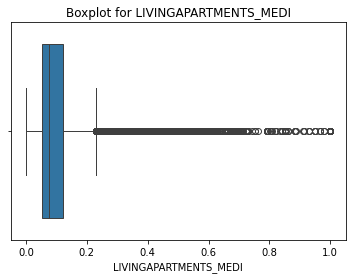

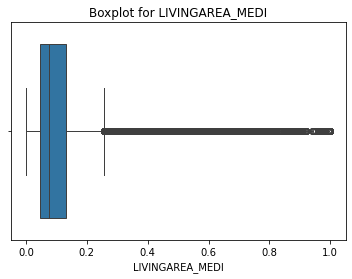

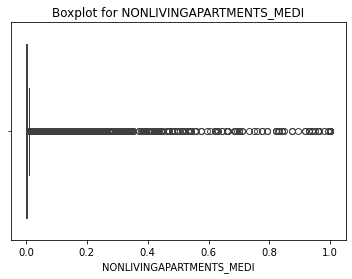

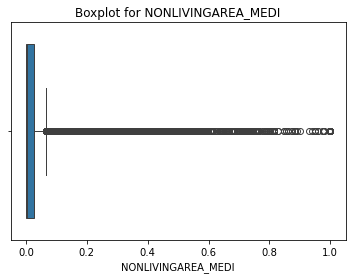

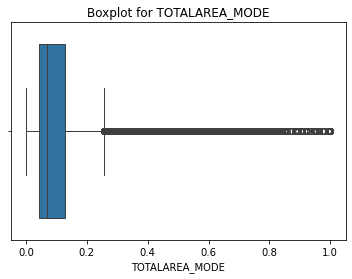

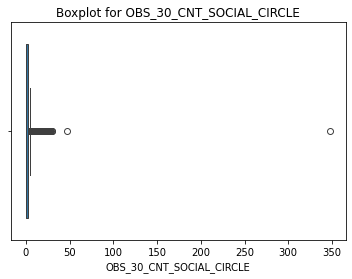

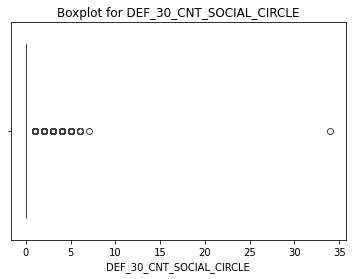

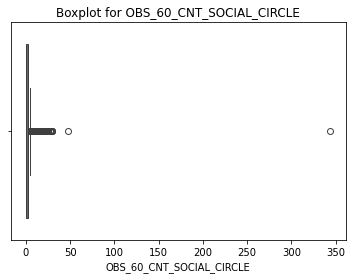

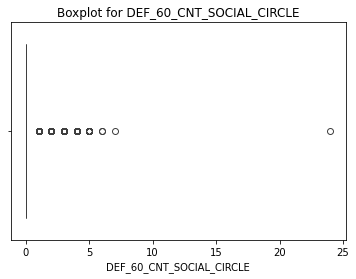

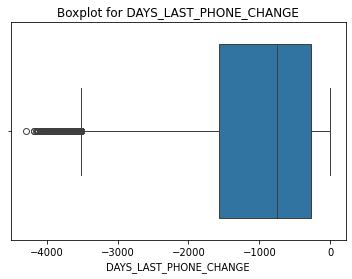

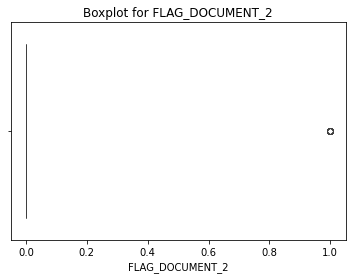

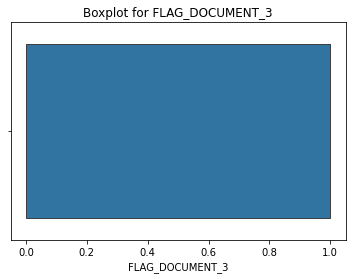

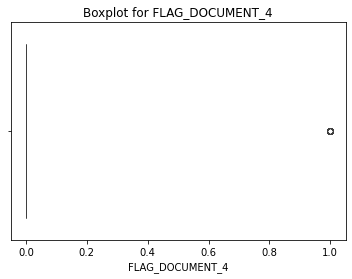

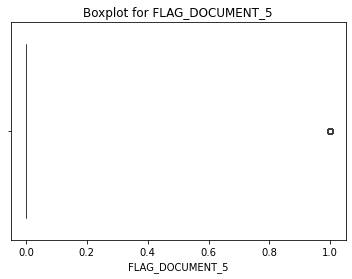

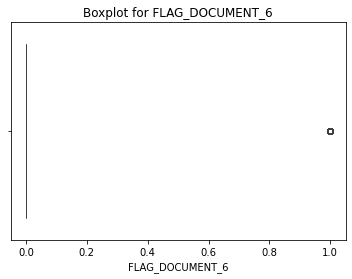

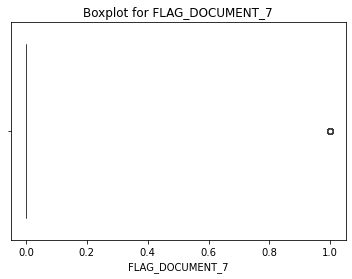

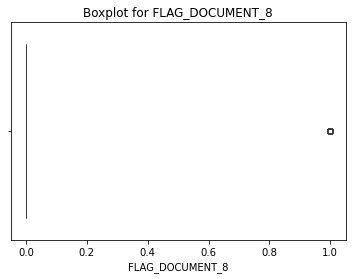

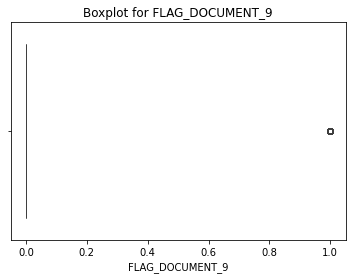

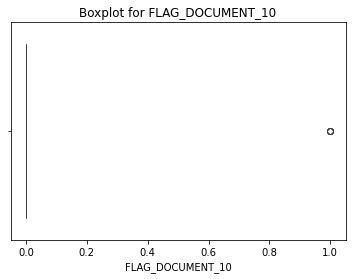

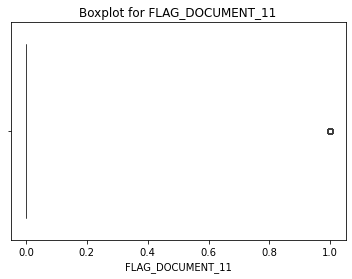

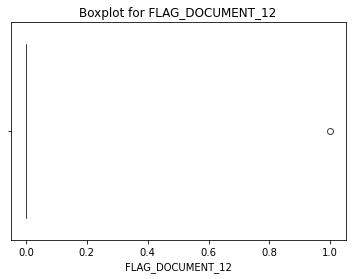

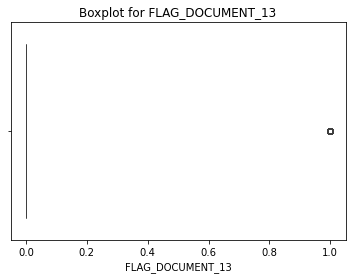

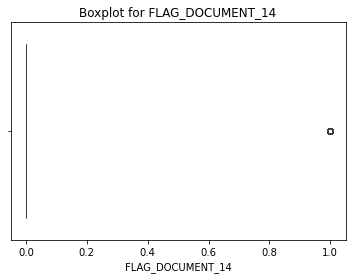

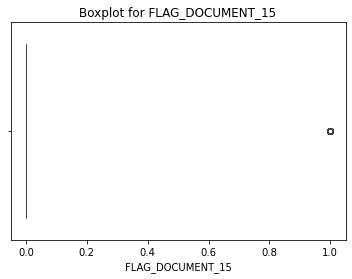

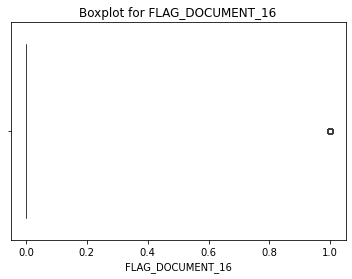

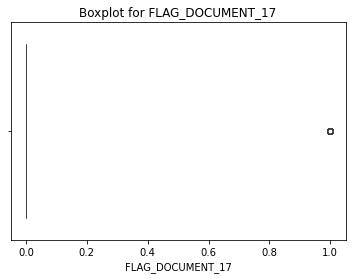

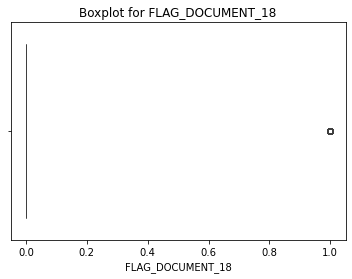

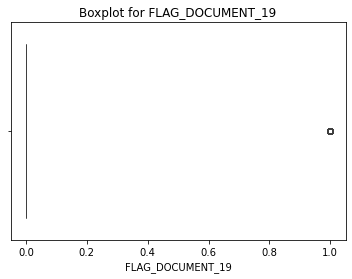

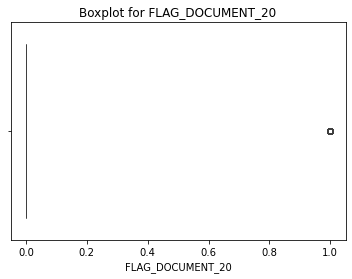

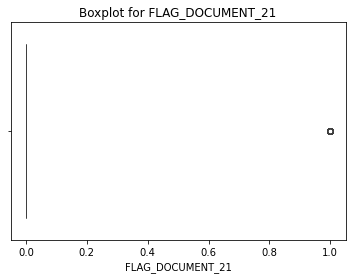

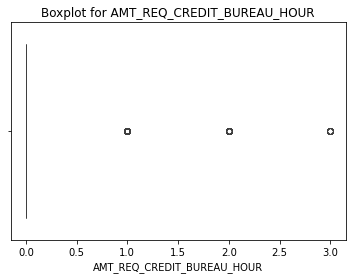

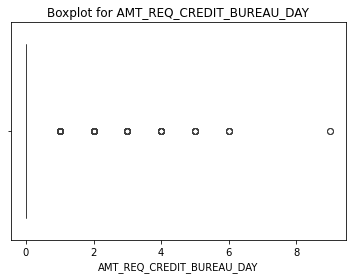

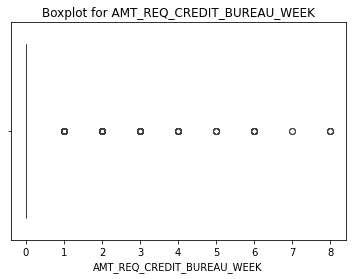

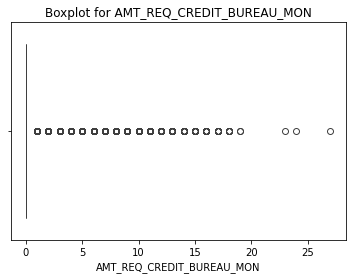

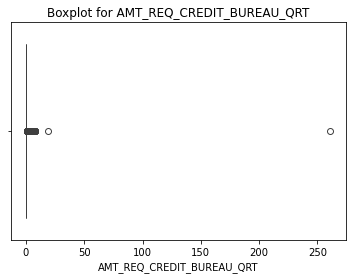

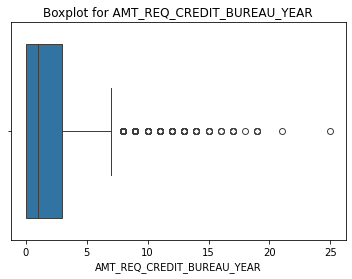

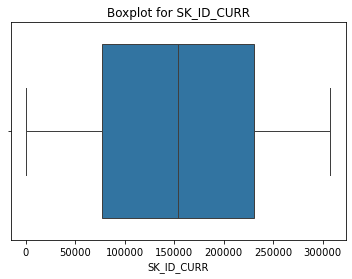

In [35]:
## Check outliters
plt.figure(figsize=(10, 7))

for column in numerical_data.columns:
    # Create a boxplot for the column
    sns.boxplot(x=numerical_data[column])

    # Set the title of the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

#### Based on the boxplot for all the numerical data. 
* We see that there are many columns that contain only 2 value (0,1) but the difference between each values is too high. Here are all the table can be seen clearly from the given boxplots

    + The Target value is imbalanced, the value 0 takes a huge part -> that can reduce the accuracy of the model
    + There are a lot of personal information following this trend, like contains phones, or check client's permanent address -> can be removed

    + All the document except document 3 -> should be removed 

In [36]:
# Check valid value
from Functions import check_value
check_value(numerical_data)

TARGET  has     >0 19876,  =0 226133  ,   <0 0,    nan: 0,   other values: 0
CNT_CHILDREN  has     >0 73676,  =0 172333  ,   <0 0,    nan: 0,   other values: 0
AMT_INCOME_TOTAL  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 245999,  =0 0  ,   <0 0,    nan: 10,   other values: 0
AMT_GOODS_PRICE  has     >0 245785,  =0 0  ,   <0 0,    nan: 224,   other values: 0
REGION_POPULATION_RELATIVE  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_BIRTH  has     >0 0,  =0 0  ,   <0 246009,    nan: 0,   other values: 0
DAYS_EMPLOYED  has     >0 44324,  =0 2  ,   <0 201683,    nan: 0,   other values: 0
DAYS_REGISTRATION  has     >0 0,  =0 59  ,   <0 245950,    nan: 0,   other values: 0
DAYS_ID_PUBLISH  has     >0 0,  =0 13  ,   <0 245996,    nan: 0,   other values: 0
OWN_CAR_AGE  has     >0 82120,  =0 1701  ,   <0 0,    nan: 162188,   other values: 0
FLAG_MOBIL

In [37]:
for i in categorical_data.columns[:8]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_CONTRACT_TYPE : ['Cash loans', 'Revolving loans']



col CODE_GENDER : ['F', 'M', 'XNA']

col FLAG_OWN_CAR : ['N', 'Y']

col FLAG_OWN_REALTY : ['N', 'Y']

col NAME_TYPE_SUITE : ['Family', 'Unaccompanied', 'Spouse, partner', 'Children', 'Other_A', nan, 'Group of people', 'Other_B']

col NAME_INCOME_TYPE : ['State servant', 'Working', 'Pensioner', 'Commercial associate', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']

col NAME_EDUCATION_TYPE : ['Higher education', 'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

col NAME_FAMILY_STATUS : ['Married', 'Civil marriage', 'Single / not married', 'Widow', 'Separated', 'Unknown']



In [38]:
for i in categorical_data.columns[8:]:
    print(f'col {i} : {list(categorical_data[i].unique())}\n')

col NAME_HOUSING_TYPE : ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']

col OCCUPATION_TYPE : ['Core staff', 'Laborers', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff', 'Private service staff', 'Medicine staff', 'Security staff', 'Accountants', 'Cooking staff', 'High skill tech staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'Waiters/barmen staff', 'IT staff', 'HR staff']

col WEEKDAY_APPR_PROCESS_START : ['MONDAY', 'WEDNESDAY', 'THURSDAY', 'SATURDAY', 'FRIDAY', 'TUESDAY', 'SUNDAY']

col ORGANIZATION_TYPE : ['School', 'Business Entity Type 3', 'Religion', 'Other', 'XNA', 'Electricity', 'Medicine', 'Self-employed', 'Transport: type 2', 'Business Entity Type 2', 'Construction', 'Housing', 'Kindergarten', 'Trade: type 7', 'Industry: type 11', 'Military', 'Services', 'Security Ministries', 'Transport: type 4', 'Government', 'Emergency', 'Security', 'Trade: type 2', 'University', 'Transport: 

# EDA Process

### Univariate

In [41]:
df1.shape

(246009, 122)

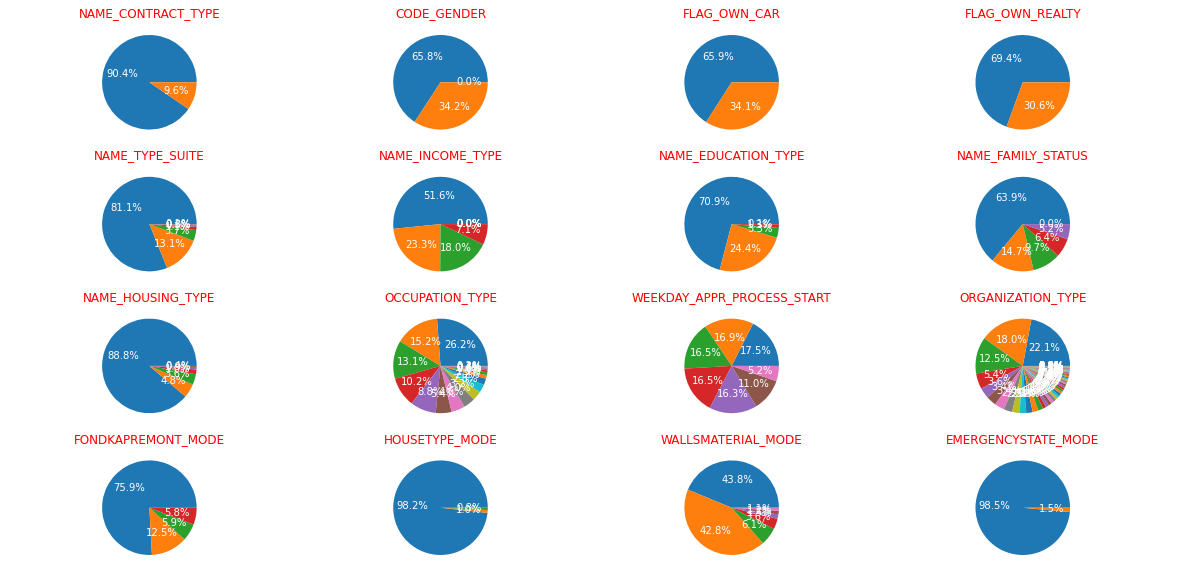

In [51]:
col= categorical_data.columns
fig, ax = plt.subplots(round(len(col)/4),4,figsize=(20,10))
ite = 0 
for i in range(0,round(len(col)/4)):
    for j in range(0,4):
        sizes = categorical_data[col[ite]].value_counts(normalize=True)
        ax[i][j].pie(sizes, autopct='%1.1f%%',labels = sizes.index, textprops=dict(color="white"))
        ax[i][j].set_title(col[ite], color = 'red')
        ite +=1
# Show the figure
plt.show()

Followed this chart, we can see that:

* Name_housing_type 88.8% loaning clients live in their own house 
* In Name_type_suite, Almost the clients take a loan by themselves -> they are in the middle - age
* And in housetype_mode and emergencystate_mode , they have a signigicant differences between each value -> we can drop these columns 

## The Effect of all the features to the target columns
* This data set is all about the information related to clients
* I can divide it into small parts
    + Personal Information
    + Family Information
    + Working Information